# DTSC670: Foundations of Machine Learning Models

## Assignment 3: Multiple Linear Regression

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details
The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. 

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [2]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [3]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"
### ENTER CODE HERE ###
data = pd.read_csv(fileName)

# Display the first few rows of the data to verify the import
print(data.head())

           x          y           z
0   8.340440   9.588740  209.008524
1  14.406490  13.648816  325.449818
2   0.002287   0.590582    1.651778
3   6.046651   6.393511  141.464904
4   2.935118   4.302151   83.204506


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

C:\Users\ben\AppData\Local\Temp\ipykernel_4620\2675565855.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
C:\Users\ben\AppData\Local\Temp\ipykernel_4620\2675565855.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
C:\Users\ben\AppData\Local\Temp\ipykernel_4620\2675565855.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax3.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
C:\Users\ben\AppData\Local\Temp\ipykernel_4620\2675565855.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax4.scatter3D(data['x'], data['y'], data['z'], cmap='jet')


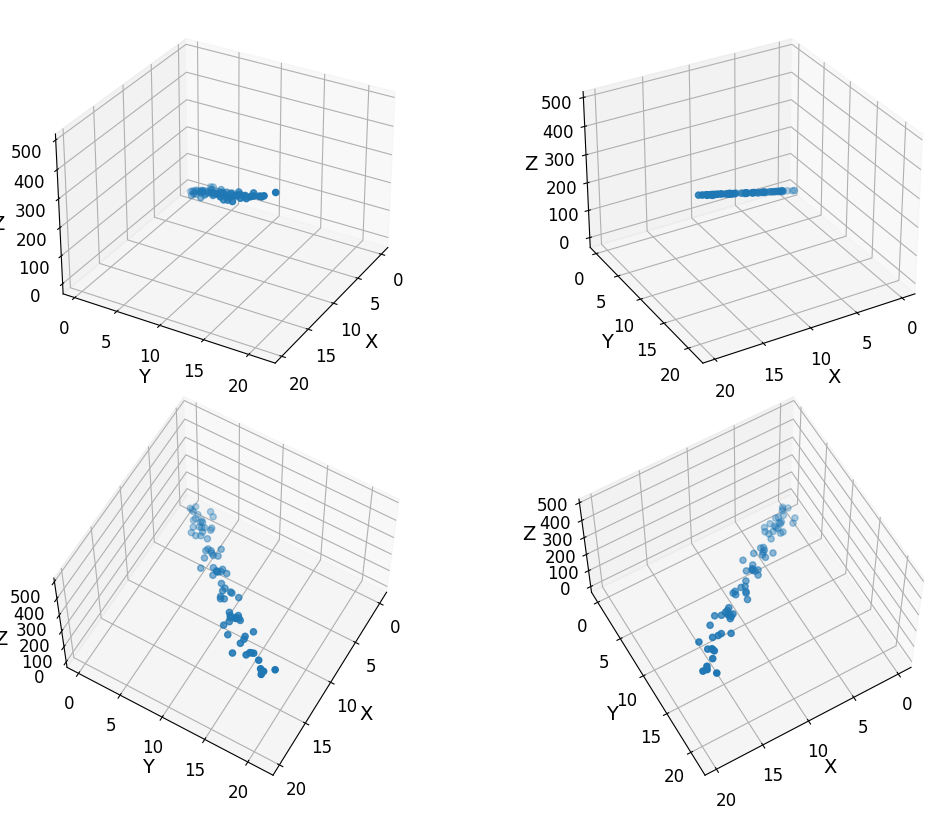

In [4]:
from mpl_toolkits import mplot3d

### ENTER CODE HERE ###
from mpl_toolkits import mplot3d

# Create a figure and four subplots
fig = plt.figure(figsize=(12, 8))

# Subplot 1: Viewing angle (30, 30)
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax1.view_init(30, 30)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Subplot 2: Viewing angle (30, 60)
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax2.view_init(30, 60)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Subplot 3: Viewing angle (60, 30)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax3.view_init(60, 30)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Subplot 4: Viewing angle (60, 60)
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax4.view_init(60, 60)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

# Adjust layout and save the figure
plt.tight_layout()
plt.show()

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response. 

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [5]:
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression model
model = LinearRegression()

# Prepare the features (x, y) and the response (z)
X = data[['x', 'y']]
y = data['z']

# Fit the model to the data
model.fit(X, y)

# Print the optimal model parameters
print("Model Coefficients: ", model.coef_)
print("Model Intercept: ", model.intercept_)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept:  -8.63287677506068


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed together as a DataFrame to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.

C:\Users\ben\AppData\Local\Temp\ipykernel_4620\63537577.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(data['x'], data['y'], data['z'], cmap='jet', label='Data Points')


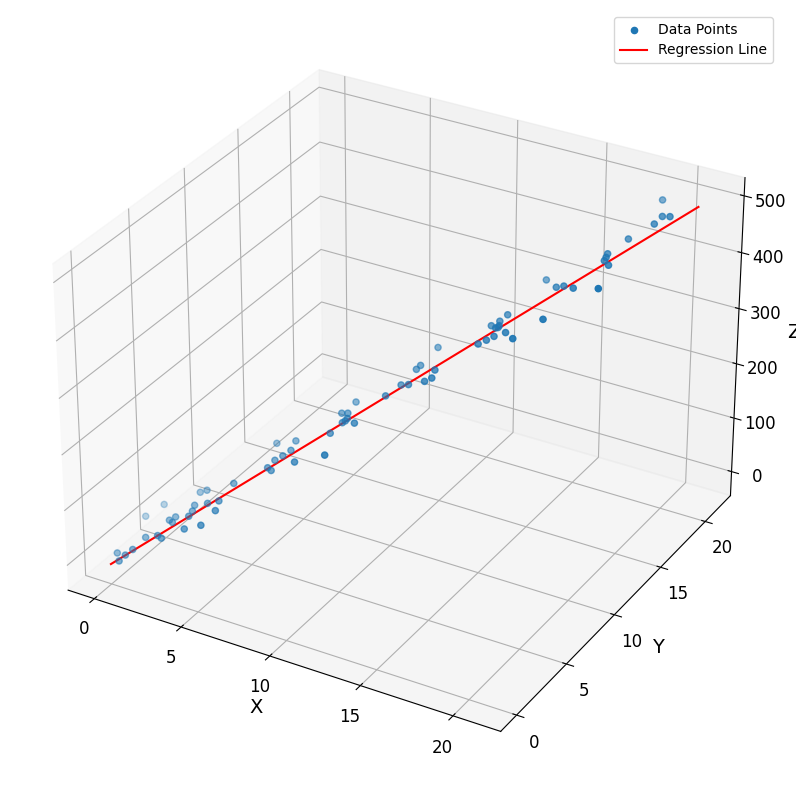

In [6]:
# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit

### ENTER CODE HERE ###
# Prepare the features (x_fit, y_fit) as a DataFrame
X_fit = pd.DataFrame({'x': x_fit, 'y': y_fit})

# Use the model to predict z_fit for each (x_fit, y_fit) pair
z_fit = model.predict(X_fit)

# Create the second image
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter3D(data['x'], data['y'], data['z'], cmap='jet', label='Data Points')

# Plot the regression line
ax.plot3D(x_fit, y_fit, z_fit, 'r-', label='Regression Line')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.show()

Recreate the first image, but plot the line of best fit in each of the subplots as well.

C:\Users\ben\AppData\Local\Temp\ipykernel_4620\3419654013.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
C:\Users\ben\AppData\Local\Temp\ipykernel_4620\3419654013.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
C:\Users\ben\AppData\Local\Temp\ipykernel_4620\3419654013.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax3.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
C:\Users\ben\AppData\Local\Temp\ipykernel_4620\3419654013.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax4.scatter3D(data['x'], data['y'], data['z'], cmap='jet')


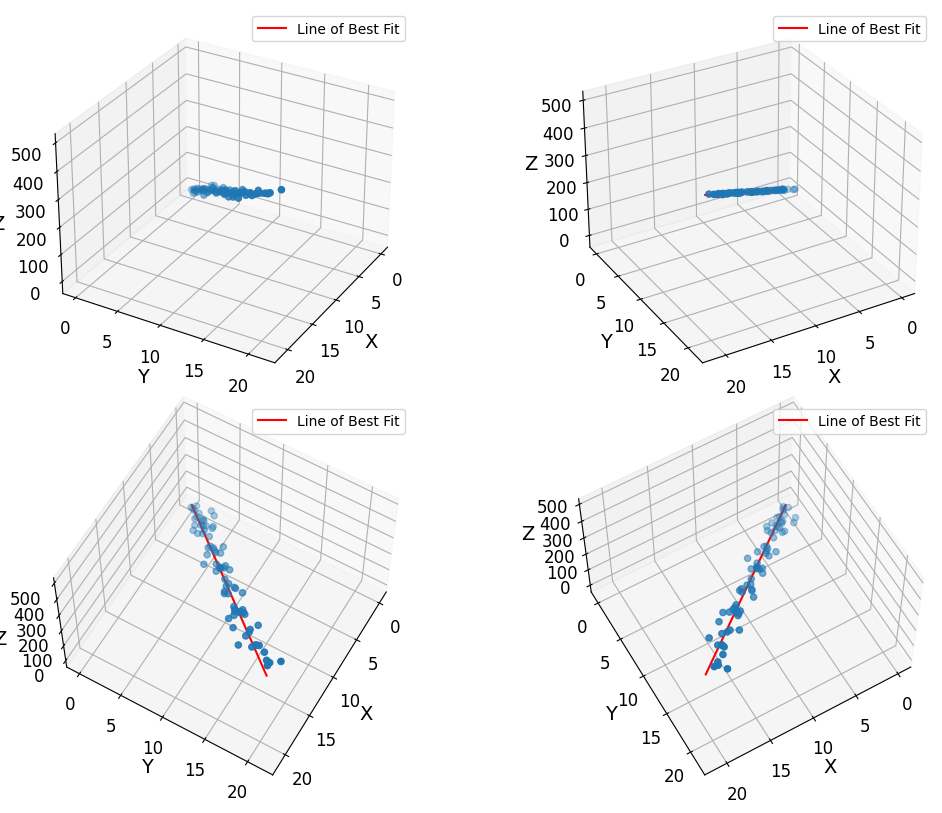

In [7]:
### ENTER CODE HERE ###
from mpl_toolkits import mplot3d

# Create a figure and four subplots
fig = plt.figure(figsize=(12, 8))

# Subplot 1: Viewing angle (30, 30)
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax1.view_init(30, 30)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the line of best fit in Subplot 1
X_fit_1 = pd.DataFrame({'x': x_fit, 'y': y_fit})
z_fit_1 = model.predict(X_fit_1)
ax1.plot3D(x_fit, y_fit, z_fit_1, 'r-', label='Line of Best Fit')
ax1.legend()

# Subplot 2: Viewing angle (30, 60)
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax2.view_init(30, 60)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot the line of best fit in Subplot 2
X_fit_2 = pd.DataFrame({'x': x_fit, 'y': y_fit})
z_fit_2 = model.predict(X_fit_2)
ax2.plot3D(x_fit, y_fit, z_fit_2, 'r-', label='Line of Best Fit')
ax2.legend()

# Subplot 3: Viewing angle (60, 30)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax3.view_init(60, 30)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Plot the line of best fit in Subplot 3
X_fit_3 = pd.DataFrame({'x': x_fit, 'y': y_fit})
z_fit_3 = model.predict(X_fit_3)
ax3.plot3D(x_fit, y_fit, z_fit_3, 'r-', label='Line of Best Fit')
ax3.legend()

# Subplot 4: Viewing angle (60, 60)
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter3D(data['x'], data['y'], data['z'], cmap='jet')
ax4.view_init(60, 60)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

# Plot the line of best fit in Subplot 4
X_fit_4 = pd.DataFrame({'x': x_fit, 'y': y_fit})
z_fit_4 = model.predict(X_fit_4)
ax4.plot3D(x_fit, y_fit, z_fit_4, 'r-', label='Line of Best Fit')
ax4.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.show()

# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters. 

The true model parameters that I selected are <b>integer values</b>. Given this information, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value. You may "hard-code" these values into the below print statements.

In [8]:
# print("True Model Coefficients: ", "### ENTER CODE HERE ###")
# print("True Model Intercept : ", "### ENTER CODE HERE ###")
# Round the model coefficients and intercept to the nearest integer
true_model_coefficients = np.round(model.coef_).astype(int)
true_model_intercept = int(np.round(model.intercept_))

# Print the true model parameters
print("True Model Coefficients: ", true_model_coefficients)
print("True Model Intercept: ", true_model_intercept)


True Model Coefficients:  [ 8 16]
True Model Intercept:  -9
